#  Machine Learning for Bioinformatics
## Practical Homework No.4 (100 points)

#### Name: Amirreza kazemi
#### Student No.: 95105827


## Imports

run below cell to import necessary libraries. You are only allowed to use these libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)



## Dataset (10 points)

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

In [54]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# load all data using pandas. 
# DataSet.csv as train dataset.
# labels.csv as data labels.
# And Drop columns including call name as these columns as it doesn't have any 
# statistical relevance
##################################################################################### 
Train_Data = None
labels = None
Train_Data = pd.read_csv("DataSet.csv")
labels = pd.read_csv("labels.csv")
####################################################################################
#                                   THE END                                        #
####################################################################################  
Train_Data.head()


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,57,58,60,61,65,66,63,64,62,72
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,178,340,31,396,141,95,146,431,9,211
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206


Here we go to pre process the data for pca analysis. do these steps one by one

In [55]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# Drop Gene Description and Gene Accession Number to have a numeric matrix.
# the result should be stored in train variable.
#####################################################################################
train = None
train = Train_Data.drop(Train_Data.columns[[0, 1]], 1)
####################################################################################
#                                   THE END                                        #
####################################################################################  
train.index = pd.to_numeric(train.index)
train.sort_index(inplace=True)


## Variable Selection

To reduce the computation costs, instead of working on all 20184 genes present in the dataset, we will focus on 1000 genes that have the most variance.

In [56]:
# TODO: limited_data should contain columns of data corresponding to genes with most variance
limited_data = None
variance = train.var(axis = 1)
train['var'] = variance
sorted_data = train.sort_values(by=['var'], ascending= False)
limited_data = sorted_data.drop(sorted_data.columns[[72]], 1)
limited_data = limited_data.head(1000)
limited_data = limited_data.T
limited_data.head()


,5709,5710,18,5506,1867,5647,5228,1221,6223,4016,...,1569,6372,5923,1198,4864,6567,1267,6076,2048,7037
1,17602,17962,15091,21011,-272,31086,8656,20764,-113,19748,...,443,695,509,-796,788,1624,536,730,1917,1183
2,9868,16964,11038,25240,-194,29288,13285,17636,4452,7657,...,389,812,286,-970,1691,238,1258,131,1603,1434
3,28056,23436,16692,14950,-79,14835,15704,23324,775,1032,...,443,810,610,-2111,1029,1081,2098,91,3200,2022
4,23812,22240,15763,31449,-300,25421,15691,21733,157,13356,...,509,599,294,-1555,695,1223,254,49,1416,2615
5,3553,5472,18128,12606,-157,29543,3390,20332,2175,13769,...,35,282,375,-331,1627,761,127,0,1749,924


## PCA (30 points)


Implement PCA. Then use it to project the data to the latent space. Finally, reconstruct the data and report the reconstruction error for both training and test datasets. Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues of a matrix.

In [57]:
def loss_function(a, b):
  #####################################################################################
  #                          COMPLETE THE FOLLOWING SECTION                           #
  #####################################################################################
  # Implement a function that given the original data and a
  # reconstructed version, returns the reconstruction's mean squared error.
  #####################################################################################
    result = None
    result = (np.square(a - b)).mean()
  ####################################################################################
  #                                   THE END                                        #
  #################################################################################### 
    return result

In [58]:
def PCA(X, n_components=72):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # n_components: size of latent space (< M)
    # returns a vector of shape (n_components, M) containing the first `n_components` PCs.
    #####################################################################################
    vector = None
    X = np.asarray(X)
    X = X - np.mean(X, axis=0)
    u, s, vt = np.linalg.svd(X)
    s2 = s * s
    mask = np.argsort(s2)
    mask = mask[:n_components]
    vector = vt[mask, :]
    ####################################################################################
    #                                   THE END                                        #
    #################################################################################### 
    return vector

In [59]:
pca = PCA(limited_data)


In [60]:
def reconstruct_PCA(X):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # Compute PCs for the X.
    # Project X to the space of computed PCs.
    # Reconstruct X from projected data.
    #####################################################################################
    X = np.asarray(X)
    principal_components = None
    projected_data = None
    reconstructed_data = None
    principal_components = PCA(X)
    projected_data = np.dot(X - np.mean(X, axis = 0), principal_components.T)
    reconstructed_data = np.dot(projected_data, principal_components) + np.mean(X, axis =0)
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################     
    return reconstructed_data


In [61]:
pca_rec = reconstruct_PCA(limited_data)

In [62]:
## Run This cell to find how your functions working!
loss_function(pca_rec , limited_data.values.tolist())

1.4876654445075172e-23

## K-Means (20 points)



read the below cell codes. this is using sklearn pca implementation. we use this function to use in our kmeans clustering.

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(limited_data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf = principalDf.set_index(labels.index)
finalDf = pd.concat([principalDf, labels['cancer']], axis = 1)
finalDf


,PC1,PC2,cancer
0,4.341202,-4.770869,ALL
1,14.195648,1.693616,ALL
2,14.183927,-1.751283,ALL
3,1.756293,-3.357066,ALL
4,11.519685,-9.365321,ALL
5,-5.593931,-3.373494,ALL
6,-4.647442,-0.191848,ALL
7,-3.575623,0.717450,ALL
8,31.054508,-3.559067,ALL
9,0.721518,-5.655028,ALL


here we try to initialize centroids. Note that we already knows we have two cluster, So from our prior knowledge we define number of clusters equal to two.

In [64]:
np.random.seed(1000)
# Number of clusters
k = 2
X = np.array(list(zip(finalDf['PC1'], finalDf['PC2'])))
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[23.  0.]
 [ 7. 30.]]


Now you can see the unlabeled data and our initialization data by running following cell

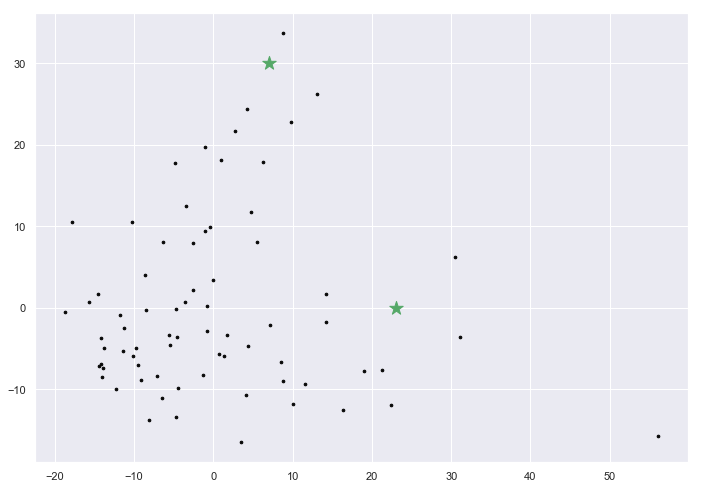

In [65]:
# Plotting along with the Centroids
plt.scatter(finalDf['PC1'], finalDf['PC2'], c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

It's your turn. Implement K-Means function which return a np.array with size equal to your data. this array contain each point label that you assigned using kmeans clustering.

In [66]:
def Kmeans(X, Centroids):
    clusters = np.zeros(len(X))
      # To store the value of centroids when it updates
    C = Centroids
    C_old = np.zeros(C.shape)
      # Cluster Lables(0, 1)
    clusters = np.zeros(len(X))
      # Error func. - Distance between new centroids and old centroids
    error = np.linalg.norm(C - C_old)
      ####################################################################################
      #                          COMPLETE THE FOLLOWING SECTION                          #
      ####################################################################################
      # Implement K-Means Clustering
      # Assigning each value to its closest cluster
      # Storing the old centroid values
      # Finding the new centroids by taking the average value
      # clusters variable should contain (0,1) labels. 0 for first cluster and 1 for the second. 
      ####################################################################################
      # Loop will run till the error becomes zero
      # Do Not Forget to update error condition.
    
    
    while error != 0:
        x1dis = np.linalg.norm(X - C[0], axis = 1)
        x2dis = np.linalg.norm(X - C[1], axis = 1)
        #print(x1dis, x2dis)
        dif = x1dis - x2dis
        #print(dif)
        clusters = np.where(dif > 0, 1, 0)
        mask1 = np.argwhere(clusters == 0)
        mask2 = np.argwhere(clusters == 1)
        #print(mask1, mask2)
        C_old = C
        a = np.mean(X[mask1], axis = 0)
        b = np.mean(X[mask2], axis = 0)
        C = np.array([a[0], b[0]])
        error = np.linalg.norm(C - C_old)
        
        
        

      ####################################################################################
      #                                   THE END                                        #
      ####################################################################################
    return clusters, C

In [67]:
clusters, C = Kmeans(X, C)
print(C, clusters)

[[-0.73560073 -5.60245301]
 [ 2.05193888 15.62789525]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0]


Now just run cell below to plot your result. 

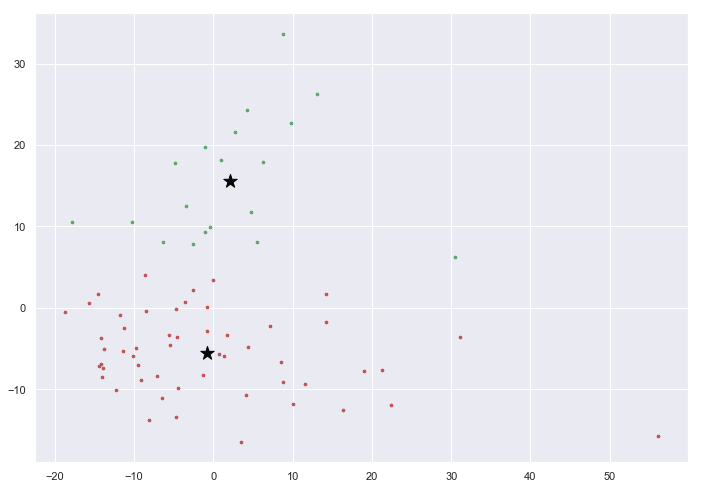

In [68]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

This part shows real labels of the samples. just run this cell and answer the next question. 

(-20, 25)

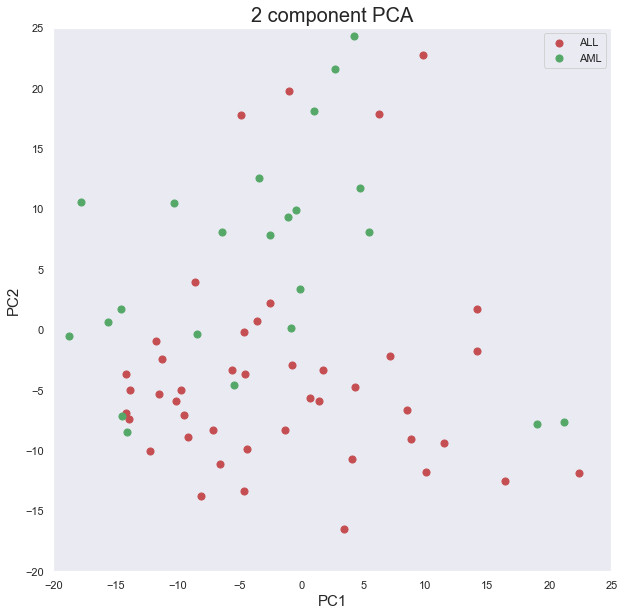

In [69]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['ALL','AML']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
ax.set_xlim([-20, 25])
ax.set_ylim([-20, 25])

Compare your results with the figure above and tell us what will change if we change the random seed (try it with two or three different seeds) and what is the solution?

--> 
   Write Your Answer Here 
<--
<div style="direction:rtl;line-height:300%;text-align:justify"><font face="XB Zar" size=4>
با توجه به اینکه روش kmeans به تنظیم نقاط مرکزی هر خوشه حساس است اگر مقدار seed تغییر کند نقاط اولیه خوشه تغییر کرده و در نتیجه الگوریتم kmeans به خوشه بندی های متفاوتی همگرا میشود . برای اینکه الگوریتم نقاط اولیه را به صورت تصادفی انتخاب نکند و احتمال همگرایی به مینیمم محلی کاهش بیابد میتوان از روش هایی همچون furthest point و kmeans++ استفاده کرد که سعی میکنند نقاط اولیه را به گونه ای انتخاب کنند که تمام فضای دادگان را به نوعی پوشش دهد
</font></div>

## GMM (30 points)

The EM algorithm for GMM can be simplified in the following steps:

Assuming K is the number of clusters, and N is the number of data points


$z_j^i$ is 1 if $x^i$ is generated from mixture j

Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$ k=1,...K


$\theta=[\pi,\mu,\Sigma]$
## E step:
$\gamma_j^i=P(z_j^i=1|x^i, \theta^{old})=\frac{\pi_j^{old}\mathcal{N}(x^i|\mu_j^{old},\Sigma_j^{old})}{\sum_{k=1}^K\pi_k^{old}\mathcal{N}(x^i|\mu_k^{old},\Sigma_k^{old})}$

## M step:
$\mu_j^{new}=\frac{\sum_{i=1}^N \gamma_j^i x^i}{\sum_{i=1}^N \gamma_j^i}$


$\Sigma_j^{new} = \frac{1}{\sum_{i=1}^N \gamma_j^i} \sum_{i=1}^N \gamma_j^i (x^i-\mu_j^{new}) (x^i-\mu_j^{new})^T$


$\pi_j^{new} = \frac{\sum_{i=1}^N \gamma_j^i}{N}$

Repeat E and M steps until convergence.


In [70]:
import math
import scipy
from scipy.stats import multivariate_normal

class GMM(object):
    def __init__(self, x, k, iterations):
        self.x = x
        self.n = x.shape[0] # data points
        self.f = x.shape[1] # features
        self.k = k  # number of clusters
        self.iterations = iterations

        self.predictions = np.zeros((self.n, self.k))
        
        # TODO: initialte parameters
        self.pi = None  # of size (k)
        self.mu = None  # of size (k, f)
        self.sigma = None  # of size (k, f, f)
        self.pi = np.bincount(clusters)/(self.n)  # of size (k)
        self.mu = C  # of size (k, f)
        self.sigma = np.zeros((self.k, self.f, self.f))  # of size (k, f, f)
        for i in range(self.k):
            matrix = self.x[clusters == i]
            self.sigma[i] = np.cov(matrix.T)
    def calc_gamma(self):
        # TODO: calculate gamma matrix based on parameters and x
        # returns a matrix of shape (n, k) where n is the number of data points
        gamma = np.zeros((self.n, self.k))
        for j in range(self.k):
            gamma[:, j] = self.pi[j] * scipy.stats.multivariate_normal.pdf(self.x, self.mu[j, :], self.sigma[j])  

        return np.nan_to_num(gamma / np.sum(gamma, axis=1)[:, None])
        '''
        for i in range(self.n):
            row_sum = 0
            for j in range(self.k):
                coeff = 1/ math.sqrt((2* math.pi)** self.f * np.linalg.det(self.sigma[j]))
                a = np.asarray(self.x[i]- self.mu[j]).reshape(2, 1)
                temp1 = np.dot(a.T, np.linalg.inv(self.sigma[j]))
                #print(self.sigma[j])
                temp2 = np.dot(temp1, a)
                self.predictions[i, j] = coeff * (math.exp(-1/2 * temp2))
                row_sum += self.predictions[i, j]

            self.predictions[i, :] /= row_sum
        
        return self.predictions
        '''
            
        pass
        
    def update_mu(self, gamma):
        for j in range(self.k):
            makhraj = 0
            soorat = np.zeros((self.f))
            for i in range(self.n):
                soorat += gamma[i, j] * self.x[i]
                #print(gamma[i, j])
                makhraj += gamma[i, j]
            #print(makhraj)
            self.mu[j] = soorat / makhraj
        #print(self.mu)
        return self.mu
                
        # TODO: update self.mu based on x and gamma matrix
        pass
    
    def update_sigma(self, gamma):
        # TODO: update self.sigma based on x, mu and gamma matrix
        mu = self.update_mu(gamma)
        for j in range(self.k):
            makhraj = 0
            soorat = np.zeros((self.f, self.f))
            for i in range(self.n):
                makhraj += gamma[i, j]
                a = np.asarray(self.x[i] - mu[j]).reshape(2, 1)
                #print(np.dot(self.x[i] - mu[j], (self.x[i] - mu[j]).T))
                soorat += gamma[i, j] * np.dot(a, a.T)
                #print(soorat)
            self.sigma[j] = soorat / makhraj
                
        pass
        
    def update_pi(self, gamma):
        # TODO: update self.pi based on gamma matrix
        for j in range(self.k):
            soorat = 0
            for i in range(self.n):
                soorat += gamma[i, j]
            self.pi[j] = soorat / self.n
                
        pass
        
    def fit(self):
        for i in range(self.iterations):
            gamma = self.calc_gamma()
            self.update_mu(gamma)
            self.update_sigma(gamma)
            self.update_pi(gamma)

        
        # TODO: predict the mixture for each data
        self.predictions = np.argsort(gamma, axis=1)[:,-1]
        
        
        

In [71]:
gmm = GMM(X, 2, 30)
gmm.fit()
gmm_clusters = gmm.predictions 




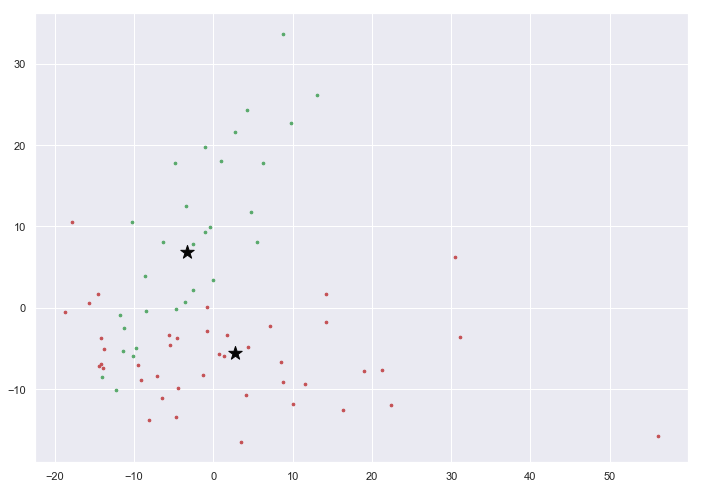

In [72]:
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if gmm_clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## t-SNE (10 points)

In this part we are using a generated dataset to test the effect of t-SNE hyperparameters.
The data points are on two paralllel lines with a small additive noise.

In [73]:
# load the dataset

X = np.load('X.npy')
y = np.load('y.npy')
print(X.shape)
print(y.shape)

(200, 20)
(200,)


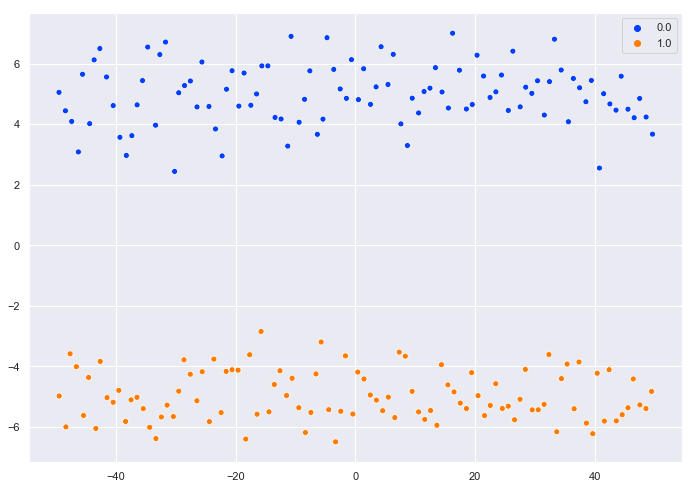

In [74]:
# plot data in 2 dimensions using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=y, legend='full', palette=palette)

Find the best hyperparameters such that the output of t-SNE is similar to the output of PCA. Please make sure that your results are stable. Try running t-SNE a few times until you get the same results.

You can use [this link](https://distill.pub/2016/misread-tsne/) for help!

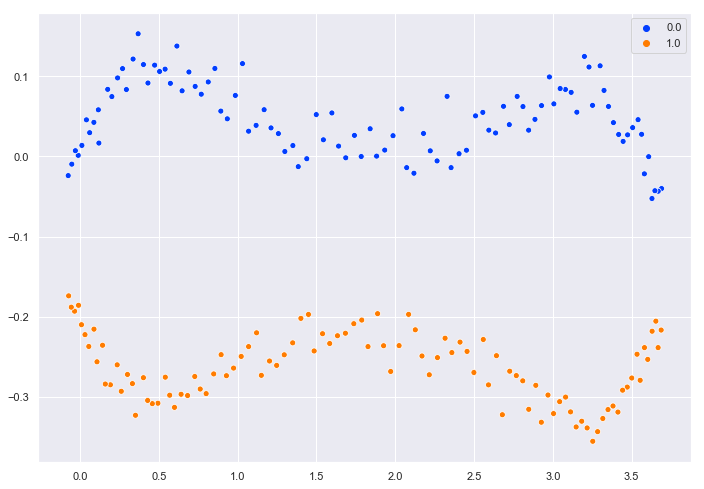

In [80]:

tsne = TSNE(learning_rate= 100, n_iter=10000, perplexity= 150, min_grad_norm=1e-10, random_state=10)  # TODO: set hyperparameters

X_embedded = tsne.fit_transform(X)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

Are the lines perfectly straight? Can you explain why? 

--> 
   Write Your Answer Here 
<--
<div style="direction:rtl;line-height:300%;text-align:justify"><font face="XB Zar" size=4>
    همان طور که مشاهده میشود  در میانه خطوط اعوجاج داریم . دلیل این اعوجاج این است که روشtsne برای اینکه local structure را حفظ کند باید به نقاطی که فاصله نزدیکی از هم دارند شباهت زیادی اختصاص بدهد . چون تعداد نقاط با شباهت بالا یا به عبارت دیگر با شباهت یکسان در ابعاد بالا بیشتر از ابعاد پایین است ، به دلیل کمبود فاصله نقاط میانی اعوجاج پیدا کرده اند و روی یک خط صاف نیستند . 
    دلیل اینکه خطوط در انتها به صورت دم شده اند این است که در روش tsne از توزیع tstudent استفاده میشود و این توزیع به دلیل heavy tailed بودن شباهت میان نقاط با فاصله متوسط از هم را حفظ میکند و در فضای با ابعاد کمتر آنها را خیلی دور از هم قرار نمیدهد .
    
</font></div>